In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [3]:
#data import 
images = np.load('images.npy')
labels = np.load('labels.npy')
imageFlat = np.reshape(images, (6500,28*28)) 
labelsEncode = keras.utils.to_categorical(labels, num_classes=10,dtype="int32")
print(imageFlat.shape)
print(labels.shape)
print(labelsEncode.shape)

(6500, 784)
(6500,)
(6500, 10)


In [4]:
#stratify data. Split dataset into train and test with ratio of 0.75 train and 0.25 test
def data_stratify(imageFlat, labels, labelsEncode):
    labelsEncode_train = np.zeros(shape=(0,10), dtype=int)
    labelsEncode_test = np.zeros(shape=(0,10), dtype=int)
    labels_test = np.array([], dtype=int)
    images_train = np.zeros(shape=(0,imageFlat.shape[1]), dtype=int)
    images_test = np.zeros(shape=(0,imageFlat.shape[1]), dtype=int)
    ## labelsEncode represent label as array, on the contrary labels_test represent it as single number 
    for i in range(0,10):
        indexs = np.where(labels == i)[0]
        np.random.shuffle(indexs)
        split_point = int(len(indexs)*0.75)
        
        labelsEncode_train = np.concatenate((labelsEncode_train, labelsEncode[indexs[:split_point]]), axis=0)
        labelsEncode_test = np.concatenate((labelsEncode_test, labelsEncode[indexs[split_point:]]), axis=0)
        labels_test = np.concatenate((labels_test, labels[indexs[split_point:]]), axis=0)
        
        images_train = np.concatenate((images_train, imageFlat[indexs[:split_point]]), axis=0)
        images_test = np.concatenate((images_test, imageFlat[indexs[split_point:]]), axis=0)
    #print(len(labelsEncode_train))
    #print(len(labelsEncode_test))
    #print(len(images_train))
    #print(len(images_test))
    #print(len(labels_test))    
    shuffle_train_index = np.arange(len(labelsEncode_train))
    np.random.shuffle(shuffle_train_index)
    labelsEncode_train = labelsEncode_train[shuffle_train_index]
    images_train = images_train[shuffle_train_index]
    
    shuffle_test_index = np.arange(len(labelsEncode_test))
    np.random.shuffle(shuffle_test_index)
    labelsEncode_test = labelsEncode_test[shuffle_test_index]
    images_test = images_test[shuffle_test_index]
    labels_test = labels_test[shuffle_test_index]
    return labelsEncode_train, labelsEncode_test, images_train, images_test, labels_test


In [5]:
def two_layers_model(rounds, epochs, batch_size, imageFlat, labels, labelsEncode):
    ##set a two layers neural networks as model 
    highest_accuracy = 0
    avg_accruacy = 0.0
    best_model = Sequential()
    best_mode_history = {}
    best_prediction = np.array([], dtype="int32");
    best_test = np.array([], dtype="int32");
    for j in range(0, rounds):
        (labelsEncode_train, labelsEncode_test, images_train, images_test, labels_test) = data_stratify(imageFlat, labels, labelsEncode)
        model = Sequential() # declare model
        model.add(Dense(10, input_shape=(28*28, ), kernel_initializer='he_normal')) # first layer
        model.add(Activation('relu'))
        model.add(Dense(10, kernel_initializer='he_normal')) # last layer
        model.add(Activation('softmax'))
    
        # Compile Model
        model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
        history = model.fit(x=images_train, y=labelsEncode_train, 
                        validation_split = 0.2,
                        epochs=epochs, 
                        shuffle=True,
                        verbose = 0,
                        batch_size=batch_size)
        test_result = model.predict(images_test)
        prediction =np.zeros((len(test_result),), dtype=int)
        
        for i in range(0,len(test_result)):
            prediction[i] = np.argmax(test_result[i])
        Accuracy = np.sum(prediction == labels_test)/len(prediction)
        avg_accruacy += Accuracy
        print("current round " + str(j) + " accuracy is " + str(Accuracy))
        print(model.evaluate(images_test,labelsEncode_test))
        if highest_accuracy < Accuracy:
            highest_accuracy = Accuracy
            best_model = model
            best_mode_history = history.history
            best_prediction = prediction
            best_test = labels_test
    avg_accruacy = avg_accruacy/rounds
    return highest_accuracy,avg_accruacy, best_model, best_mode_history, best_prediction, best_test 

def three_layers_model(rounds, epochs, batch_size, imageFlat, labels, labelsEncode):
    ##set a two layers neural networks as model
    highest_accuracy = 0
    avg_accruacy = 0.0
    best_model = Sequential()
    best_model_history={}
    best_prediction = np.array([], dtype="int32");
    best_test = np.array([], dtype="int32");
    for j in range(0, rounds):
        (labelsEncode_train, labelsEncode_test, images_train, images_test, labels_test) = data_stratify(imageFlat, labels, labelsEncode)
        model = Sequential() # declare model
        model.add(Dense(10, input_shape=(28*28, ), kernel_initializer='he_normal')) # first layer
        model.add(Activation('relu'))
        model.add(Dense(10, activation='relu')) # second layer
        model.add(Dense(10, kernel_initializer='he_normal')) # last layer
        model.add(Activation('softmax'))
    
        # Compile Model
        model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
        history = model.fit(x=images_train, y=labelsEncode_train, 
                        validation_split = 0.2,
                        epochs=epochs, 
                        shuffle=True,
                        verbose = 0,
                        batch_size=batch_size)
        test_result = model.predict(images_test)
        prediction =np.zeros((len(test_result),), dtype=int)
        
        for i in range(0,len(test_result)):
            prediction[i] = np.argmax(test_result[i])
        Accuracy = np.sum(prediction == labels_test)/len(prediction)
        avg_accruacy += Accuracy
        print("current round " + str(j) + " accuracy is " + str(Accuracy))
        print(model.evaluate(images_test,labelsEncode_test))
        if highest_accuracy < Accuracy:
            highest_accuracy = Accuracy
            best_model = model
            best_mode_history = history.history
            best_prediction = prediction
            best_test = labels_test
    avg_accruacy = avg_accruacy/rounds
    return highest_accuracy, avg_accruacy, best_model, best_mode_history, best_prediction, best_test

In [6]:
def draw_history_model(history):
    val_loss_history = history['val_loss']
    loss_hisotry = history['loss']
    acc_history = history['acc']
    val_acc_history = history['val_acc']

    x = np.linspace(0, len(acc_history)-1, dtype=int)

    y1 = np.array(loss_hisotry, dtype=float)
    y2 = np.array(val_loss_history, dtype=float)
    y3 = np.array(acc_history, dtype=float)
    y4 = np.array(val_acc_history, dtype=float)

    plt.subplot(2, 2, 1, title='loss history', ylabel="loss", xlabel="epochs")
    plt.plot(x, y1[x])

    plt.subplot(2, 2, 2, title='validation loss history', ylabel="val loss", xlabel="epochs")
    plt.plot(x, y2[x])

    plt.subplot(2, 2, 3, title='acc history', ylabel="acc", xlabel="epochs")
    plt.plot(x, y3[x])

    plt.subplot(2, 2, 4, title='validation acc history', ylabel="val acc", xlabel="epochs")
    plt.plot(x, y4[x])

    plt.subplots_adjust(right=3, top=3)
    plt.show()

In [7]:
def draw_confusion_matrix(best_test, best_prediction):
    cm = np.zeros((10, 10), dtype=int)
    np.add.at(cm, [best_test, best_prediction], 1)
    print(cm)
    df_cm = pd.DataFrame(cm)
    plt.figure(figsize = (10,7))
    plt.title('Confusion Matrix of Two Layers model')
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
    plt.show()

In [8]:
def get_misclassify_index(best_model, imageFlat, labels):
    misclassified_index = np.zeros(3, dtype=int);
    prediction = best_model.predict(imageFlat)
    i = 0;
    for j in range(0, len(imageFlat)):
        if np.argmax(prediction[j]) != labels[j]:
            misclassified_index[i] = j;
            i = i+1
            if i == 3:
                break;
    return misclassified_index

In [9]:
def visualize_iamges(index, images):
    for i in index:
        plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
        plt.show()

In [10]:
#best_models is the container for best model in all cases
best_models={}

Experiment one: training model with two layers neural networks and setting batch size to 512 epochs to 100, and do 50 times model training, pick the best model and visualize it 

In [11]:
(highest_accuracy, avg_accruacy, best_model, best_model_history, best_prediction, best_test) = two_layers_model(50, 100, 512, imageFlat, labels, labelsEncode)
best_models[highest_accuracy] = best_model

current round 0 accuracy is 0.2015980331899201
1627/1627 [==============================] - 0s 9us/step
[2.1506173751364477, 0.2015980332173961]
current round 1 accuracy is 0.6502765826674862
1627/1627 [==============================] - 0s 9us/step
[5.593696576653628, 0.6502765826308515]
current round 2 accuracy is 0.7719729563614014
1627/1627 [==============================] - 0s 11us/step
[3.3274408858029036, 0.7719729568376523]
current round 3 accuracy is 0.5384142593730793
1627/1627 [==============================] - 0s 10us/step
[1.487463191600394, 0.5384142591715885]
current round 4 accuracy is 0.3896742470805163
1627/1627 [==============================] - 0s 10us/step
[1.797164583909563, 0.3896742470072469]
current round 5 accuracy is 0.3792255685310387
1627/1627 [==============================] - 0s 11us/step
[1.772521996835147, 0.3792255683295479]
current round 6 accuracy is 0.633681622618316
1627/1627 [==============================] - 0s 12us/step
[5.873524700415669, 0.6336

In [12]:
#print the test accuracy of best model, and the average accuracy for models in such setting
print("highest accruacy " + str(highest_accuracy))
print("average accruacy " + str(avg_accruacy))

highest accruacy 0.7719729563614014
average accruacy 0.4317025199754149


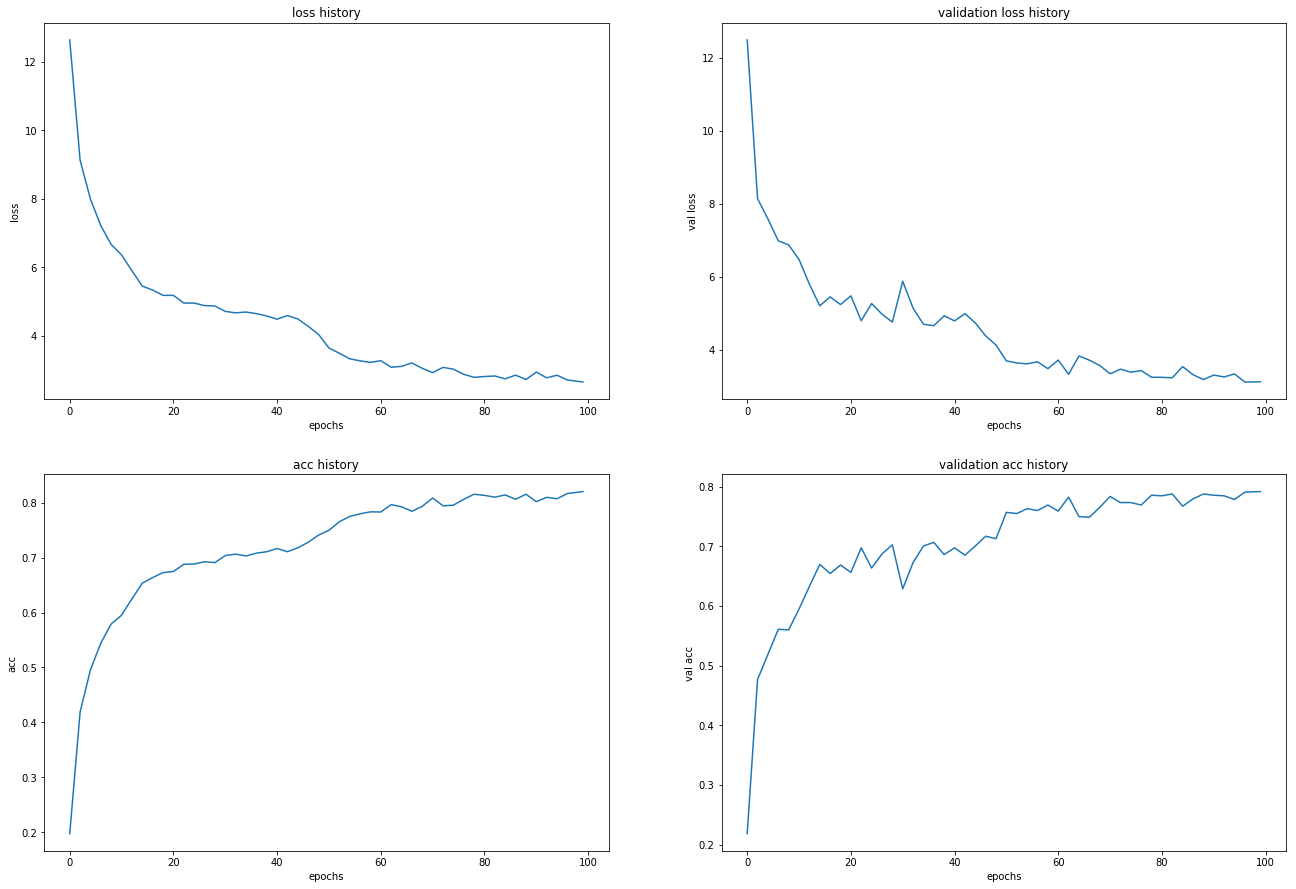

In [13]:
#draw the history of the best model in currrent setting
draw_history_model(best_model_history)

[[152   0   2   0   2   3   2   1   1   0]
 [  0   0  23  46   0   1   0   9 101   2]
 [  5   0 125   2   6   2   6   2   8   3]
 [  2   0   8 147   0   5   1   2   2   1]
 [  0   0   3   1 141   0   3   2   0  14]
 [  9   0   1   9   1 108   6   1   5   2]
 [  0   0   2   0   3   0 158   0   3   0]
 [  2   0   2   1   1   0   0 159   3   4]
 [  1   0   3   1   1   6   4   0 130   4]
 [  3   0   3   0   6   0   0  11   2 136]]


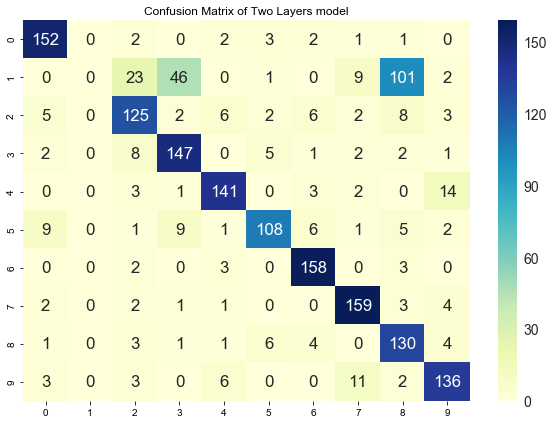

In [14]:
#draw_confusion_matrix of the best model in current setting
draw_confusion_matrix(best_test, best_prediction)

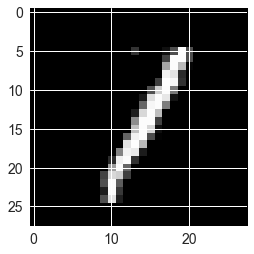

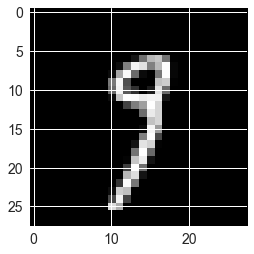

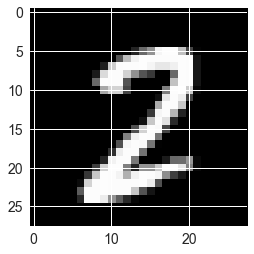

In [15]:
#visuzlize the three misclassfied image
misclassified_index = get_misclassify_index(best_model, imageFlat, labels)
visualize_iamges(misclassified_index, images)

Experiment one: training model with two layers neural networks and setting batch size to 512 epochs to 1000, and do 50 times model training, pick the best model and visualize it 

In [16]:
(highest_accuracy, avg_accruacy, best_model, best_model_history, best_prediction, best_test) = two_layers_model(50, 1000, 512, imageFlat, labels, labelsEncode)
best_models[highest_accuracy] = best_model

current round 0 accuracy is 0.48063921327596804
1627/1627 [==============================] - 0s 16us/step
[1.7090102642976073, 0.4806392134591415]
current round 1 accuracy is 0.4400737553779963
1627/1627 [==============================] - 0s 16us/step
[1.6681694626148742, 0.44007375543294835]
current round 2 accuracy is 0.6508912108174555
1627/1627 [==============================] - 0s 18us/step
[5.605607041568205, 0.6508912107808208]
current round 3 accuracy is 0.8174554394591272
1627/1627 [==============================] - 0s 17us/step
[2.9033506728420244, 0.8174554395690313]
current round 4 accuracy is 0.3779963122311002
1627/1627 [==============================] - 0s 17us/step
[1.9035029886834227, 0.3779963121578308]
current round 5 accuracy is 0.2993239090350338
1627/1627 [==============================] - 0s 18us/step
[1.8582511570238232, 0.29932390894344707]
current round 6 accuracy is 0.835279655808236
1627/1627 [==============================] - 0s 18us/step
[2.604162904625665

In [17]:
#print the test accuracy of best model, and the average accuracy for models in such setting
print("highest accruacy " + str(highest_accuracy))
print("average accruacy " + str(avg_accruacy))

highest accruacy 0.869698832206515
average accruacy 0.530719114935464


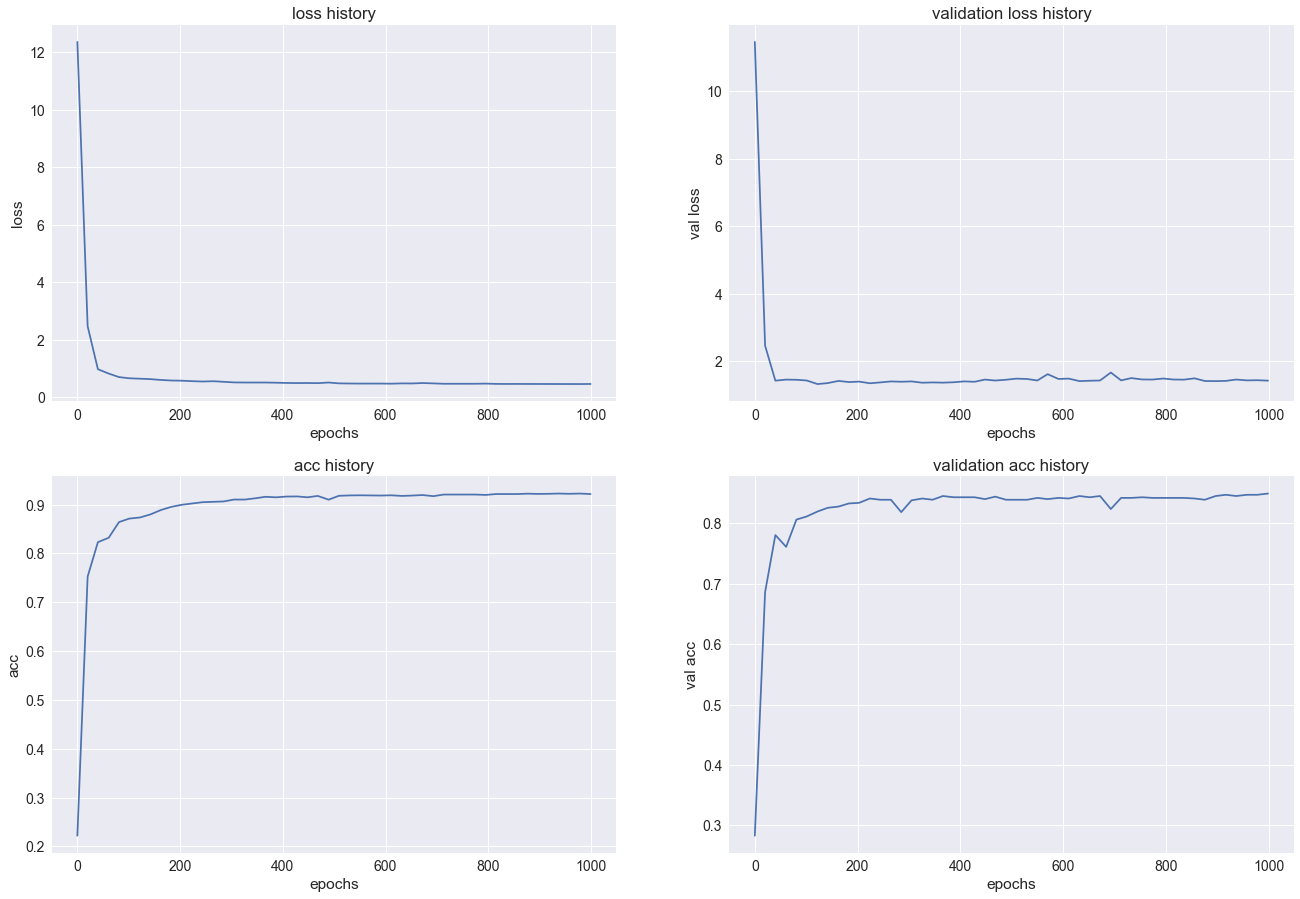

In [18]:
#draw the history of the best model in currrent setting
draw_history_model(best_model_history)

[[155   0   0   1   0   0   2   0   5   0]
 [  0 177   1   1   1   1   0   0   1   0]
 [  4   0 123   2   5   1   5   4  15   0]
 [  0   1   3 126   1   6   0   3  25   3]
 [  1   0   1   0 152   1   3   0   3   3]
 [  1   0   2   4   3 115   0   0  16   1]
 [  1   3   1   1   0   4 144   0  10   2]
 [  1   2   1   1   2   2   0 148  10   5]
 [  0   3   1   1   1   8   0   0 134   2]
 [  0   1   1   0   6   0   0   6   6 141]]


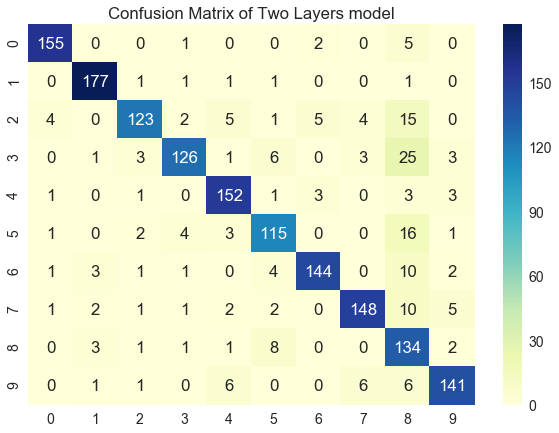

In [19]:
#draw_confusion_matrix of the best model in current setting
draw_confusion_matrix(best_test, best_prediction)

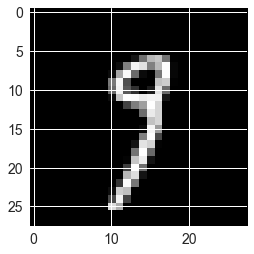

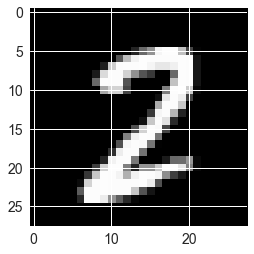

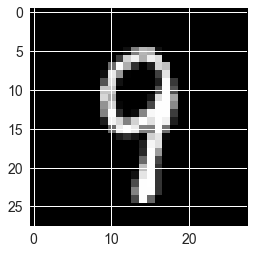

In [20]:
#visuzlize the three misclassfied image
misclassified_index = get_misclassify_index(best_model, imageFlat, labels)
visualize_iamges(misclassified_index, images)

Experiment one: training model with two layers neural networks and setting batch size to 1024 epochs to 1000, and do 20 times model training, pick the best model and visualize it 

In [21]:
(highest_accuracy, avg_accruacy, best_model, best_model_history, best_prediction, best_test) = two_layers_model(20, 1000, 1024, imageFlat, labels, labelsEncode)
best_models[highest_accuracy] = best_model

current round 0 accuracy is 0.6121696373693916
1627/1627 [==============================] - 0s 23us/step
[6.169815765397272, 0.6121696375525649]
current round 1 accuracy is 0.5371850030731408
1627/1627 [==============================] - 0s 23us/step
[1.6628659457316337, 0.5371850031280928]
current round 2 accuracy is 0.38660110633066996
1627/1627 [==============================] - 0s 23us/step
[1.8723446395255043, 0.38660110622992455]
current round 3 accuracy is 0.47264904732636753
1627/1627 [==============================] - 0s 23us/step
[1.5959632262615022, 0.4726490476560798]
current round 4 accuracy is 0.28211432083589427
1627/1627 [==============================] - 0s 23us/step
[1.9945446275536385, 0.2821143208633703]
current round 5 accuracy is 0.45912722802704364
1627/1627 [==============================] - 0s 23us/step
[8.680444871566014, 0.4591272280819957]
current round 6 accuracy is 0.5716041794714198
1627/1627 [==============================] - 0s 23us/step
[1.3736639612645

In [22]:
#print the test accuracy of best model, and the average accuracy for models in such setting
print("highest accruacy " + str(highest_accuracy))
print("average accruacy " + str(avg_accruacy))

highest accruacy 0.7264904732636754
average accruacy 0.48110018438844493


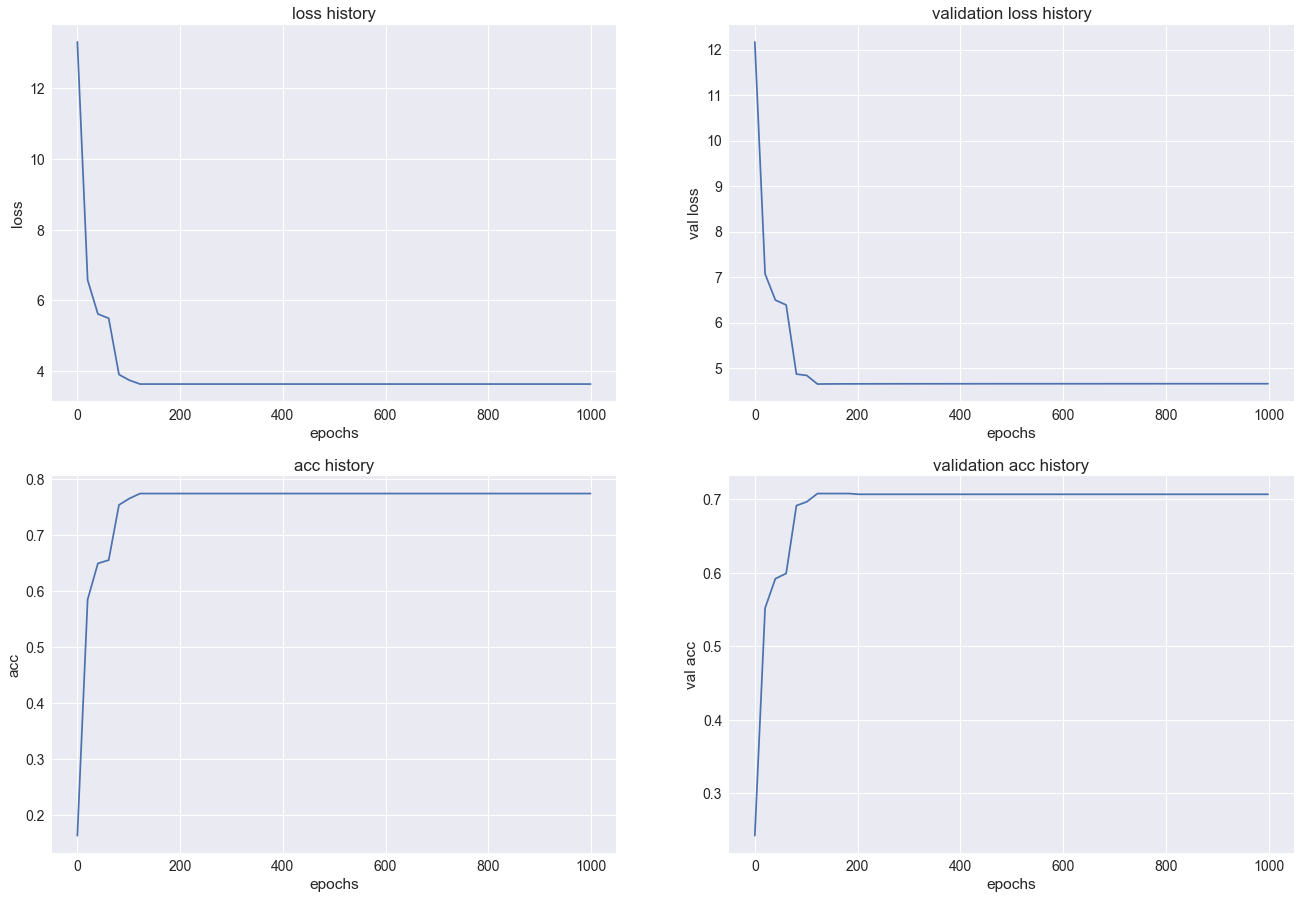

In [23]:
#draw the history of the best model in currrent setting
draw_history_model(best_model_history)

[[  0   0   9  22   1  82  34   2  13   0]
 [  0 177   0   1   0   2   0   0   2   0]
 [  0   0 148   2   1   0   4   4   0   0]
 [  0   1   3 147   0  10   2   3   2   0]
 [  0   0   2   2 150   0   5   1   4   0]
 [  0   5   2   6   5 117   5   0   2   0]
 [  0   2   0   1   6   1 154   0   2   0]
 [  0   1   2   1   7   0   1 158   2   0]
 [  0   4   4   5   2   2   2   0 131   0]
 [  0   0   1   3  88   4   0  50  15   0]]


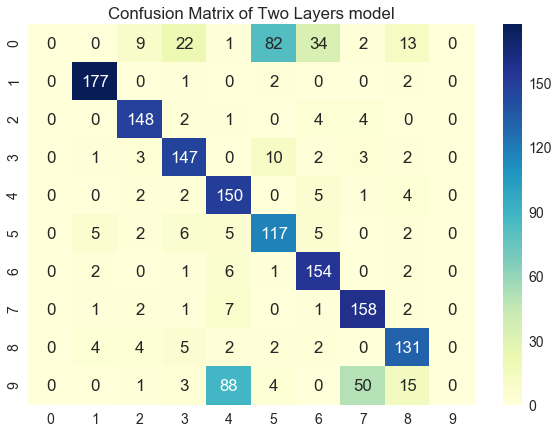

In [24]:
#draw_confusion_matrix of the best model in current setting
draw_confusion_matrix(best_test, best_prediction)

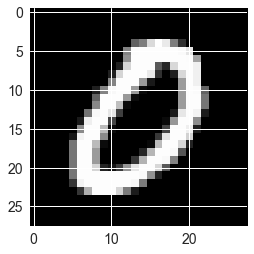

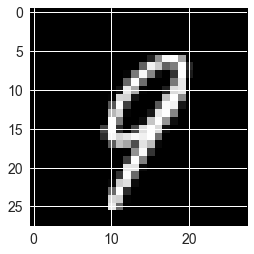

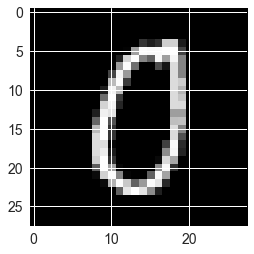

In [25]:
#visuzlize the three misclassfied image
misclassified_index = get_misclassify_index(best_model, imageFlat, labels)
visualize_iamges(misclassified_index, images)

Experiment one: training model with two layers neural networks and setting batch size to 128 epochs to 3000, and do 20 times model training, pick the best model and visualize it 

In [26]:
(highest_accuracy, avg_accuracy, best_model, best_model_history, best_prediction, best_test) = two_layers_model(20, 3000, 128, imageFlat, labels, labelsEncode)
best_models[highest_accuracy] = best_model

current round 0 accuracy is 0.28887523048555624
1627/1627 [==============================] - 0s 30us/step
[1.8554647290494153, 0.2888752302840654]
current round 1 accuracy is 0.11186232329440689
1627/1627 [==============================] - 0s 29us/step
[2.3021900595223603, 0.11186232329898622]
current round 2 accuracy is 0.35464044253226795
1627/1627 [==============================] - 0s 28us/step
[1.7294622529996415, 0.35464044256890265]
current round 3 accuracy is 0.18623232944068838
1627/1627 [==============================] - 0s 28us/step
[13.10715011181682, 0.1862323294544264]
current round 4 accuracy is 0.6398279041180086
1627/1627 [==============================] - 0s 31us/step
[5.805456227148392, 0.6398279040813739]
current round 5 accuracy is 0.21204671173939765
1627/1627 [==============================] - 0s 29us/step
[2.0709949452670426, 0.21204671163865227]
current round 6 accuracy is 0.0977258758451137
1627/1627 [==============================] - 0s 29us/step
[14.542940264

In [27]:
#print the test accuracy of best model, and the average accuracy for models in such setting
print("highest accruacy " + str(highest_accuracy))
print("average accruacy " + str(avg_accruacy))

highest accruacy 0.6490473263675476
average accruacy 0.48110018438844493


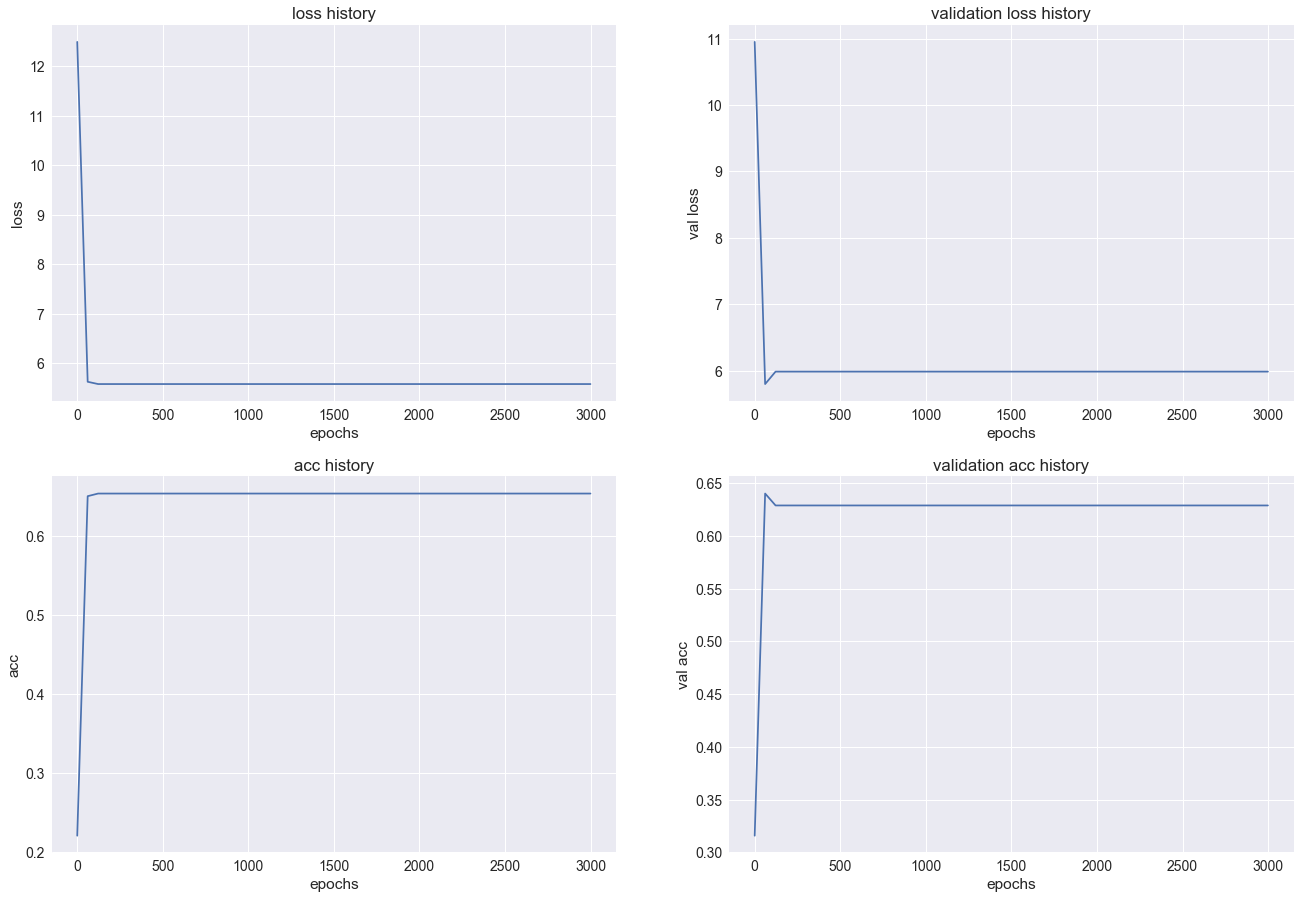

In [28]:
#draw the history of the best model in currrent setting
draw_history_model(best_model_history)

[[160   0   0   0   0   1   2   0   0   0]
 [  0 174   6   0   0   1   0   0   0   1]
 [  5   0 146   0   0   1   5   1   0   1]
 [ 10   1  57   0   0  90   2   1   0   7]
 [  3   3   3   0   0   2  10   1   0 142]
 [  4   2   4   0   0 125   4   1   0   2]
 [  2   0   5   0   0   5 154   0   0   0]
 [  1   1   4   0   0   2   0 147   0  17]
 [  5   5  39   0   0  64   2   0   0  35]
 [  3   0   2   0   0   3   0   3   0 150]]


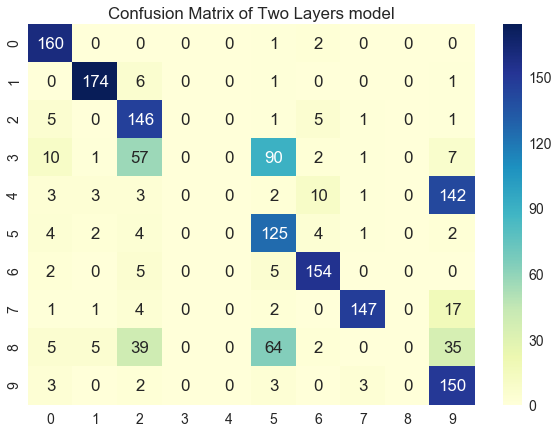

In [29]:
#draw_confusion_matrix of the best model in current setting
draw_confusion_matrix(best_test, best_prediction)

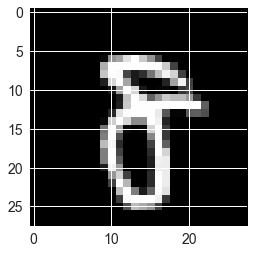

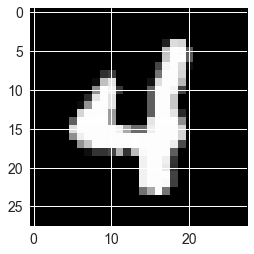

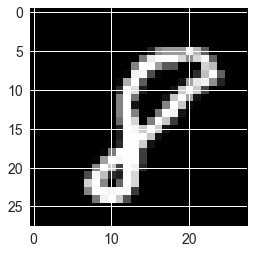

In [30]:
#visuzlize the three misclassfied image
misclassified_index = get_misclassify_index(best_model, imageFlat, labels)
visualize_iamges(misclassified_index, images)

Experiment one: training model with two layers neural networks and setting batch size to 512 epochs to 300, and do 50 times model training, pick the best model and visualize it 

In [31]:
(highest_accuracy, avg_accruacy, best_model, best_model_history, best_prediction, best_test) = three_layers_model(50, 300, 512, imageFlat, labels, labelsEncode)
best_models[highest_accuracy] = best_model

current round 0 accuracy is 0.6158574062692072
1627/1627 [==============================] - 0s 31us/step
[1.2882054905695057, 0.6158574060860337]
current round 1 accuracy is 0.38844499078057776
1627/1627 [==============================] - 0s 34us/step
[1.6817766430191856, 0.3884449908355298]
current round 2 accuracy is 0.5980331899200984
1627/1627 [==============================] - 0s 31us/step
[1.5764020327490096, 0.5980331897369249]
current round 3 accuracy is 0.5242778119237861
1627/1627 [==============================] - 0s 31us/step
[1.7247016675353564, 0.5242778116307085]
current round 4 accuracy is 0.2802704363859865
1627/1627 [==============================] - 0s 33us/step
[1.917634952412695, 0.2802704365508426]
current round 5 accuracy is 0.09219422249539029
1627/1627 [==============================] - 0s 31us/step
[14.632099925336036, 0.09219422249996963]
current round 6 accuracy is 0.20221266133988935
1627/1627 [==============================] - 0s 36us/step
[2.0880373006374

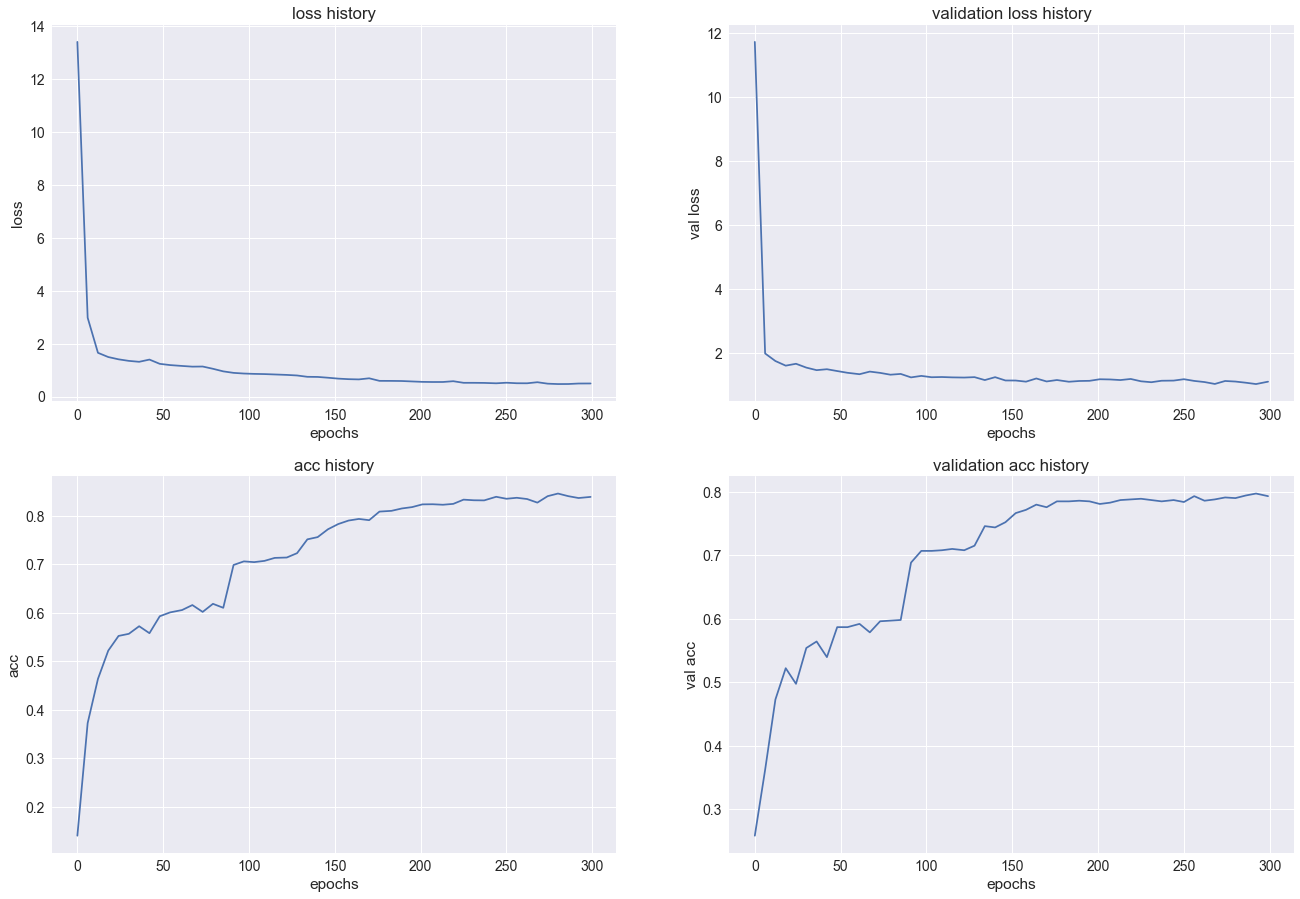

In [32]:
#draw the history of the best model in currrent setting
draw_history_model(best_model_history)

[[153   0   6   2   0   1   1   0   0   0]
 [  0 177   4   0   1   0   0   0   0   0]
 [  3   2 139   4   3   0   2   1   3   2]
 [  0   1  15 139   0   3   3   2   4   1]
 [  0   0  11   1 134   0   1   1   0  16]
 [  0   0  17   4   2 107   3   0   9   0]
 [  1   0  10   0   0   2 150   1   1   1]
 [  0   3   7   0   0   0   2 153   2   5]
 [  2   4 127   2   1   5   1   0   6   2]
 [  0   0  10   3   2   1   0   3   2 140]]


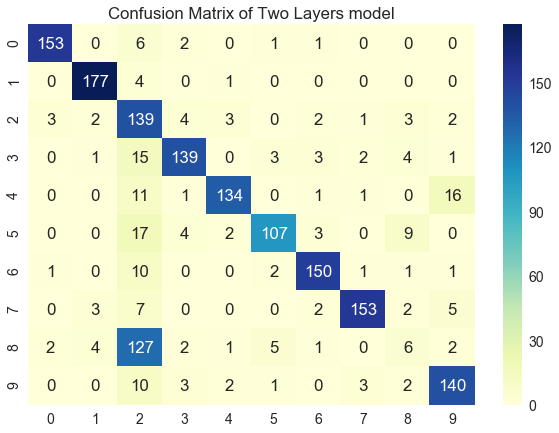

In [33]:
#draw_confusion_matrix of the best model in current setting
draw_confusion_matrix(best_test, best_prediction)

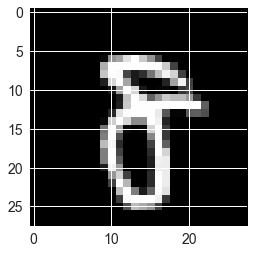

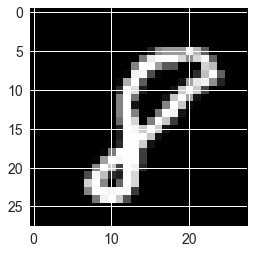

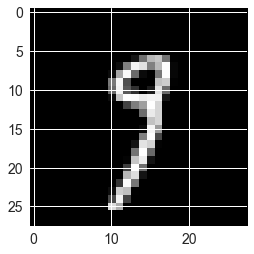

In [34]:
#visuzlize the three misclassfied image
misclassified_index = get_misclassify_index(best_model, imageFlat, labels)
visualize_iamges(misclassified_index, images)

In [38]:
best_models[max(best_models.keys())].save('best_model.h5')

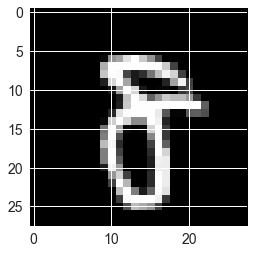

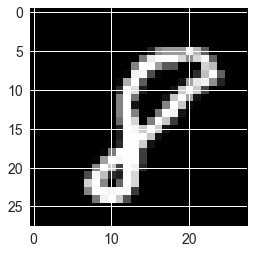

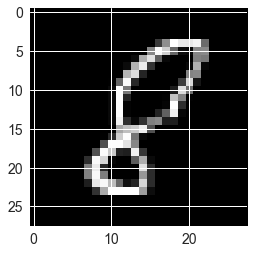

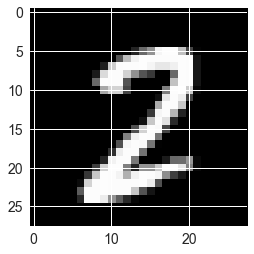

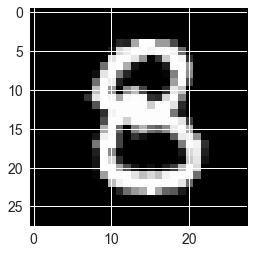

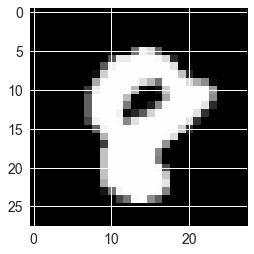

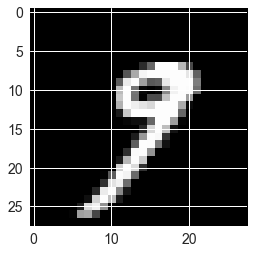

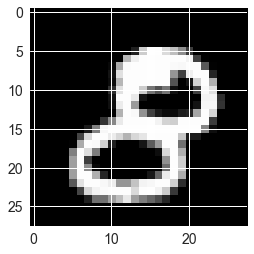

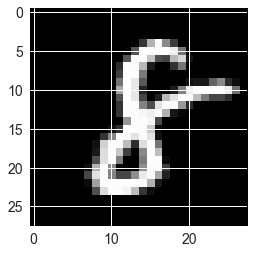

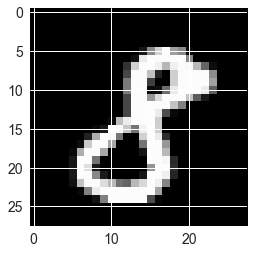

In [51]:
visualize_iamges(misclassified_index, images)